In [226]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import datetime as dt


crime_table = pd.read_csv("data sets\wibr.csv")
crime_table_historical = pd.read_csv("data sets\wibrarchive.csv")

C:\Users\anrau\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [227]:
crime_table.head()
crime_table.isnull().sum()

IncidentNum             0
ReportedDateTime        0
ReportedYear            0
ReportedMonth           0
Location              624
WeaponUsed          25582
ALD                   496
NSP                 16164
POLICE                412
TRACT                 492
WARD                  444
ZIP                   273
RoughX                273
RoughY                273
Arson                   0
AssaultOffense          0
Burglary                0
CriminalDamage          0
Homicide                0
LockedVehicle           0
Robbery                 0
SexOffense              0
Theft                   0
VehicleTheft            0
dtype: int64

In [228]:
crime_table_historical.isnull().sum()

IncidentNum              0
ReportedDateTime         0
ReportedYear             0
ReportedMonth            0
Location             14222
WeaponUsed          269823
ALD                  14072
NSP                 285748
POLICE               14072
TRACT                14072
WARD                 14072
ZIP                  14072
RoughX               14072
RoughY               14072
Arson                    0
AssaultOffense           0
Burglary                 0
CriminalDamage           0
Homicide                 0
LockedVehicle            0
Robbery                  0
SexOffense               0
Theft                    0
VehicleTheft             0
dtype: int64

In [279]:
# concat all the data from both
df = pd.concat([crime_table,crime_table_historical])

# drop null row level and columns that we won't use for time series analysis
df = df.dropna(subset = ['ALD'])
df = df.drop(['Location','WeaponUsed','NSP','POLICE','TRACT','WARD','ZIP','RoughX','RoughY'],axis = 1)

# convert Reported date time to datetime object and drop where earlier than 2016
df['ReportedDateTime'] = pd.to_datetime(df['ReportedDateTime'])
df = df.sort_values(by = ['ReportedDateTime'])
    # datetime(year, month, day, hour, minute, second, microsecond)7
past_years = dt.datetime(2018, 12, 31, 23, 59, 59)
df = df.where(df['ReportedDateTime']>past_years)
df = df.dropna()


df.head(50)



,IncidentNum,ReportedDateTime,ReportedYear,ReportedMonth,ALD,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
695291,190980060,2019-01-01 00:00:00,2019.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
673422,191220117,2019-01-01 00:00:00,2019.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
655226,190500118,2019-01-01 00:00:00,2019.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
694970,190930154,2019-01-01 00:00:00,2019.0,1.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700960,192600085,2019-01-01 00:00:00,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
729376,212990147,2019-01-01 00:00:00,2019.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
695168,190960095,2019-01-01 00:01:00,2019.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
695031,190940125,2019-01-01 00:01:00,2019.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
729886,211470148,2019-01-01 00:01:00,2019.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
704336,200200064,2019-01-01 00:01:00,2019.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [280]:
# create seasonal variables from date time objects
seasons = ['winter','winter','spring','spring','spring','summer','summer','summer','fall','fall','fall','winter']
conversion = dict(zip(range(1,13), seasons))
df['season'] = df.ReportedDateTime.dt.month.map(conversion)
# if ((df.ReportedDateTime.dt.month == 12) and (df.ReportedDateTime.dt.day == 25)):
#     df['winter flag'] = 1
# else


In [281]:
df['dayMonthYear'] = df['ReportedDateTime'].dt.strftime('%m/%d/%Y')
df = df.groupby(['dayMonthYear','season'],sort = False).agg({'Arson':'sum','AssaultOffense':'sum','Burglary':'sum',
                                     'CriminalDamage':'sum','Homicide':'sum','LockedVehicle':'sum',
                                    'Robbery':'sum','SexOffense':'sum',
                                    'Theft':'sum','VehicleTheft':'sum'}).reset_index()
#df = df.sort_values(by = ['dayMonthYear'])
df
#df.groupby(['col1','col2']).agg({'col3':'sum','col4':'sum'}).reset_index()
#grouped_by_make = auto.groupby('make')['make'].count().reset_index(name="frequency")

,dayMonthYear,season,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
0,01/01/2019,winter,0.0,45.0,8.0,7.0,2.0,6.0,10.0,15.0,22.0,9.0
1,01/02/2019,winter,1.0,20.0,5.0,5.0,0.0,8.0,4.0,2.0,16.0,9.0
2,01/03/2019,winter,0.0,21.0,12.0,6.0,0.0,7.0,7.0,2.0,15.0,9.0
3,01/04/2019,winter,0.0,23.0,11.0,4.0,0.0,4.0,7.0,4.0,19.0,5.0
4,01/05/2019,winter,1.0,27.0,7.0,15.0,0.0,9.0,5.0,2.0,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,11/28/2021,fall,0.0,13.0,3.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0
1063,11/29/2021,fall,0.0,11.0,6.0,2.0,0.0,2.0,1.0,0.0,7.0,1.0
1064,11/30/2021,fall,0.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0
1065,12/01/2021,winter,0.0,6.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0


<ipython-input-283-d87dd3e4a7e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['dayMonthYear'] = pd.to_datetime(X_train['dayMonthYear'])
<ipython-input-283-d87dd3e4a7e9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['dayMonthYear'] = X_train['dayMonthYear'].dt.date
<ipython-input-283-d87dd3e4a7e9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

<AxesSubplot:xlabel='date', ylabel='number of thefts'>

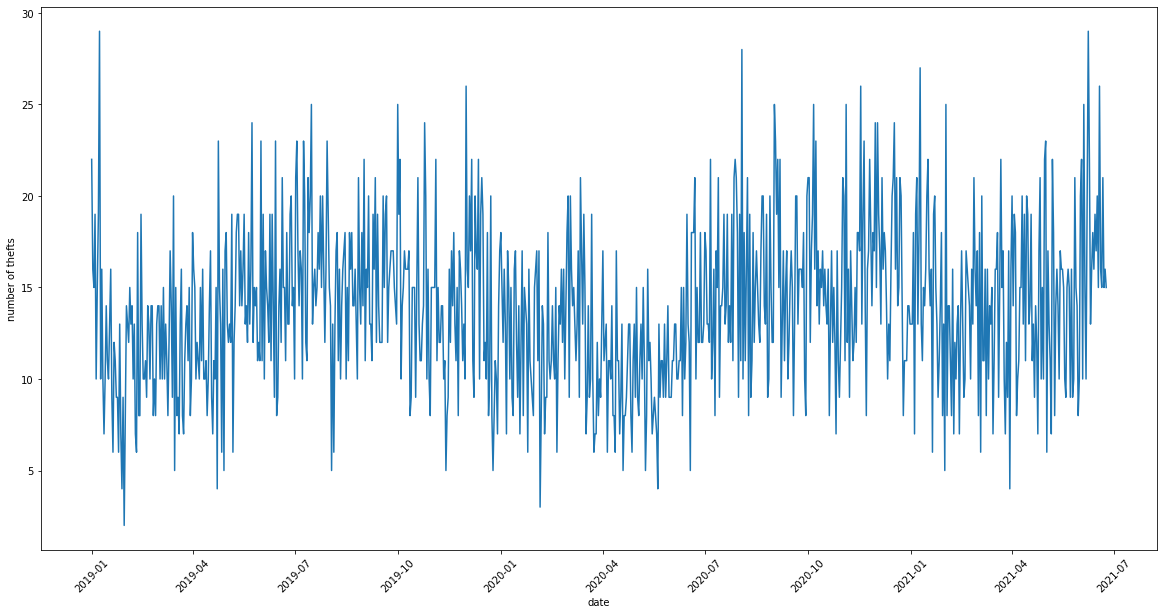

In [283]:
from sklearn.model_selection import train_test_split
from pandas.plotting import autocorrelation_plot

#drop all but theft and date
X=df.drop(['Arson','AssaultOffense','Burglary','CriminalDamage','Homicide','LockedVehicle','Robbery','SexOffense','VehicleTheft'], axis = 1)
size = int(len(X) * 0.85)
X_train, X_test = X[0:size], X[size:len(X)]
 #training setup
X_train['dayMonthYear'] = pd.to_datetime(X_train['dayMonthYear'])
X_train['dayMonthYear'] = X_train['dayMonthYear'].dt.date
X_train = X_train.set_index('dayMonthYear')
X_train = X_train.sort_values(by = ['dayMonthYear'])
temp = X_train.drop('season',axis = 1)
temp
series_train = temp.squeeze()
 #testing setup
X_test['dayMonthYear'] = pd.to_datetime(X_test['dayMonthYear'])
X_test['dayMonthYear'] = X_test['dayMonthYear'].dt.date
X_test = X_test.set_index('dayMonthYear')
X_test = X_test.sort_values(by = ['dayMonthYear'])
temp = X_test.drop('season',axis=1)
series_test = temp.squeeze()




# to_plot['dayMonthYear'] = pd.to_datetime(to_plot['dayMonthYear'])
# to_plot['dayMonthYear'] = to_plot['dayMonthYear'].dt.date
#series_train = series_train.set_index('dayMonthYear')
series_train.plot(xlabel = 'date', ylabel = 'number of thefts', rot=45,figsize = (20,10))

# time series is not stationary, needs an order of differencing

In [303]:
X_train

,season,Theft
dayMonthYear,,
2019-01-01,winter,22.0
2019-01-02,winter,16.0
2019-01-03,winter,15.0
2019-01-04,winter,19.0
2019-01-05,winter,10.0
...,...,...
2021-06-20,summer,15.0
2021-06-21,summer,21.0
2021-06-22,summer,15.0


In [304]:
X_test

,season,Theft
dayMonthYear,,
2021-06-25,summer,14.0
2021-06-26,summer,14.0
2021-06-27,summer,18.0
2021-06-28,summer,25.0
2021-06-29,summer,18.0
...,...,...
2021-11-28,fall,7.0
2021-11-29,fall,7.0
2021-11-30,fall,5.0


In [284]:
series_train

dayMonthYear
2019-01-01    22.0
2019-01-02    16.0
2019-01-03    15.0
2019-01-04    19.0
2019-01-05    10.0
              ... 
2021-06-20    15.0
2021-06-21    21.0
2021-06-22    15.0
2021-06-23    16.0
2021-06-24    15.0
Name: Theft, Length: 906, dtype: float64

In [285]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(series_train)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1]) # results with no differencing 

ADF Statistic: -3.820981
p-value: 0.002700


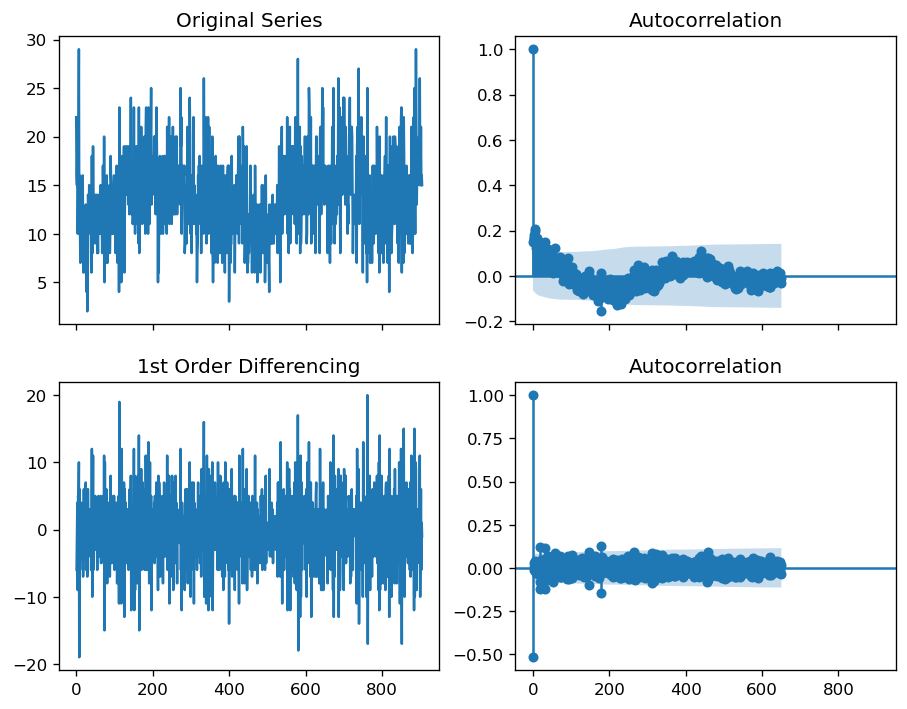

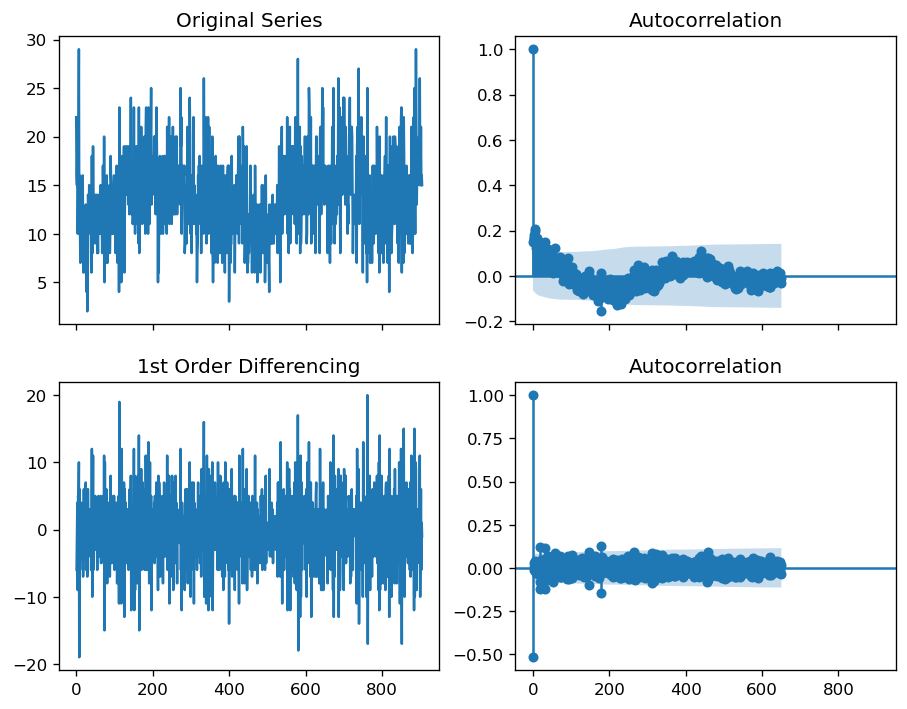

In [286]:
# results with one degree of differencing

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = X_train.reset_index()

# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(df.Theft); axes[0, 0].set_title('Original Series')
plot_acf(df.Theft, ax=axes[0, 1],lags = 650)

# 1st Differencing
axes[1, 0].plot(df.Theft.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Theft.diff().dropna(), ax=axes[1, 1],lags = 650)

# use first order differencing- that makes the series stationary

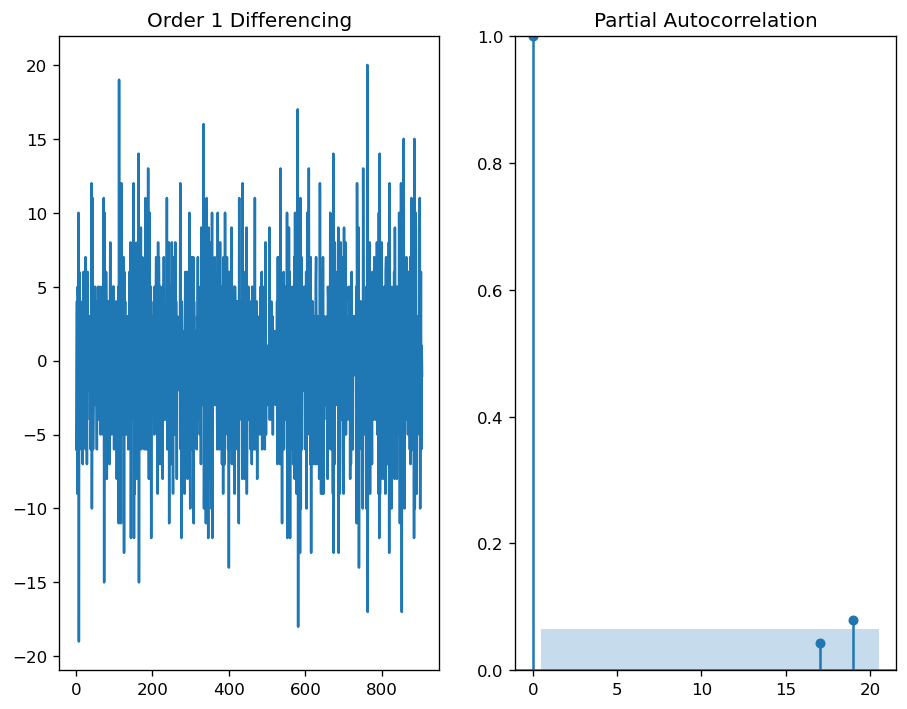

In [308]:
# partial auto correlation plot to help find a suitable p parameter
#plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df.Theft.diff()); axes[0].set_title('Order 1 Differencing')
axes[1].set(ylim=(0,1))
plot_pacf(df.Theft.diff().dropna(), ax=axes[1],lags = 20)
# the first lag is significant but the second through 700th are not, so use AR =1
plt.show()

C:\Users\anrau\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\anrau\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\anrau\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\anrau\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Theft   No. Observations:                  906
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2582.319
Date:                Mon, 06 Dec 2021   AIC                           5172.638
Time:                        15:48:33   BIC                           5191.874
Sample:                    01-01-2019   HQIC                          5179.984
                         - 06-24-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0425      0.615     22.821      0.000      12.836      15.249
ar.L1          0.9791      0.012     84.593      0.000       0.956       1.002
ma.L1         -0.9039      0.023    -39.494      0.0

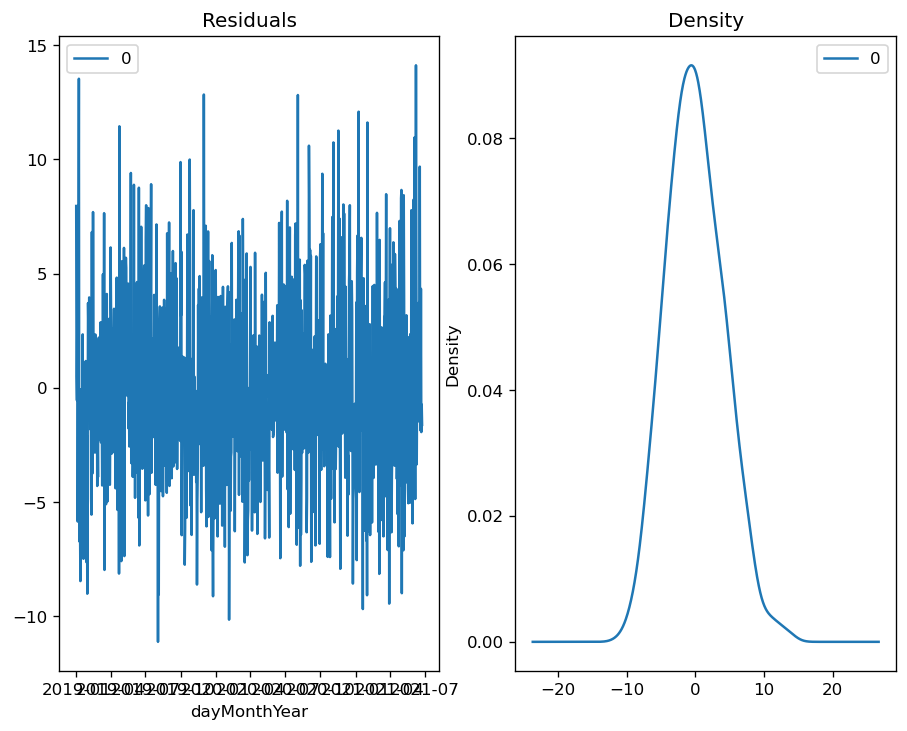

In [306]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
# order = (p,d,q)
# d = 1- the lowest degree of differencing 1,2,3... that will make the time series stationary
# p = 1- auto regressive term- refers to the number of lags will be predictors for the time series model. Y(t) is a function of the lags of Y(t)
# q = 1- refers to the error of the lagged forecast
model = ARIMA(series_train, order=(1,0,1))
# model with no
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# # line plot of residuals
# residuals = model_fit.resid
# residuals.plot()
# plt.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# plt.show()
# summary stats of residuals
#print(residuals.describe())
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

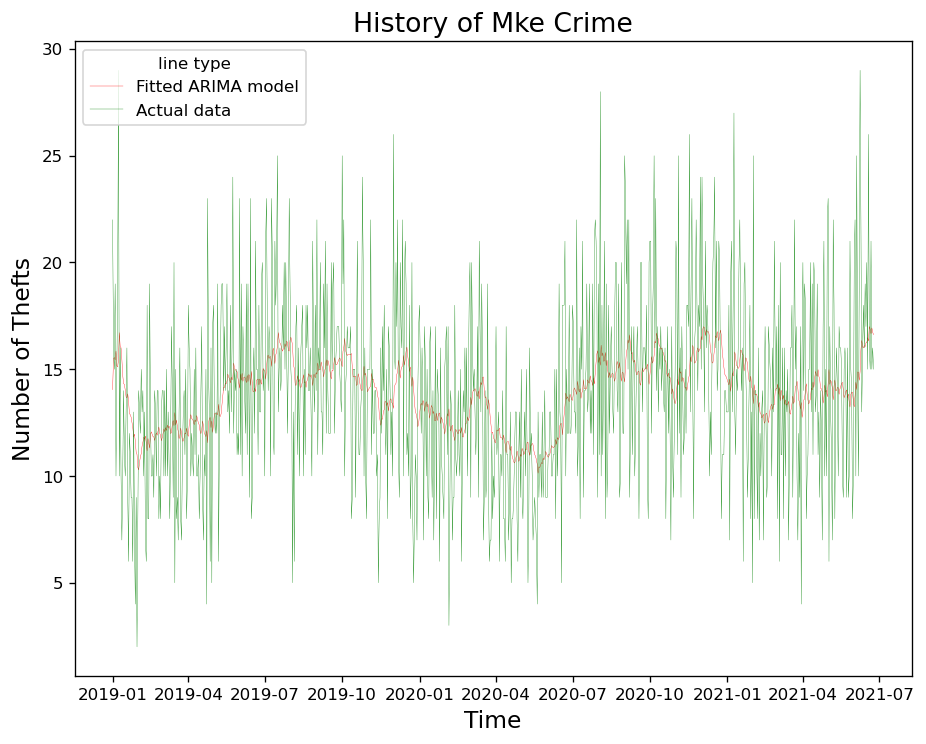

In [289]:
result = model_fit.predict()
temp = {'predicted':result}
fit = pd.DataFrame(temp)
actual = X_train.Theft
plt.plot(fit,color = 'red',linewidth = .2,label = 'Fitted ARIMA model')
plt.plot(actual,color = 'green',linewidth = .2,label = 'Actual data')
plt.legend(title='line type')
plt.ylabel('Number of Thefts', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('History of Mke Crime', fontsize=16)
plt.show()


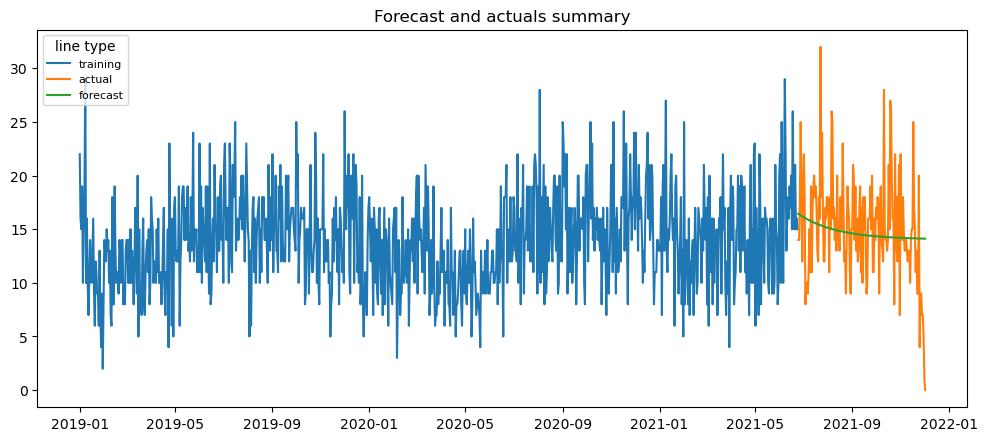

In [290]:

# Forecast
len(X_test)
number_of_days_to_forecast = 0
fc = model_fit.forecast(len(X_test) + number_of_days_to_forecast, alpha=0.05)
conf = model_fit.forecast(len(X_test) + number_of_days_to_forecast, alpha=0.05)
# fc
# # Make as pandas series
# fc_series = pd.Series(fc, index=series_test.index)
#lower_series = conf[:, 0]
#upper_series = conf[:, 1]

 # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(series_train, label='training')
plt.plot(series_test, label='actual')
plt.plot(fc, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
 #                 color='k', alpha=.15)
plt.title('Forecast and actuals summary')
plt.legend(title = 'line type',loc='upper left', fontsize=8)
plt.show()

In [291]:
fc[-1]

14.123836162795728

In [292]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, X_test.Theft)

<ipython-input-292-68b70aaecc14>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-292-68b70aaecc14>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-292-68b70aaecc14>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-292-68b70aaecc14>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  act

{'mape': inf,
 'me': -0.43657953774835434,
 'mae': 3.5733072375491615,
 'mpe': inf,
 'rmse': 4.7602917570695285,
 'corr': 0.1653201673348398,
 'minmax': 0.20412770290293247}

In [302]:
averages = X_train.groupby(['season'],sort = False).agg({'Theft':'mean'}).reset_index()
averages

,season,Theft
0,winter,13.345833
1,spring,12.536232
2,summer,15.221154
3,fall,15.131868
